<a href="https://colab.research.google.com/github/koushick07/CC_fraud/blob/main/CC_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('creditcard.csv')


In [3]:
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23853,32953,1.296815,-0.518508,0.348800,0.129750,-0.845934,-0.283287,-0.463165,-0.007344,-0.530097,...,-0.498652,-0.791893,0.058456,0.067753,0.367979,0.400899,0.005089,0.008846,14.00,0.0
23854,32954,1.295646,-0.699613,-1.129649,-2.505043,1.428275,3.010605,-0.892932,0.798386,1.309837,...,0.071540,0.120545,-0.144172,1.066577,0.615628,0.123208,0.013875,0.018547,37.07,0.0
23855,32954,-1.691394,-1.452403,1.671861,-1.769590,1.636843,-0.943701,0.193116,-0.712756,-0.987725,...,0.047745,0.539167,-0.698010,-0.470563,0.621828,-0.254508,-0.724865,-0.360165,53.80,0.0
23856,32954,1.112786,0.062772,1.481419,2.922471,-0.905121,0.366357,-0.670663,0.256586,0.599399,...,0.010125,0.346740,-0.117334,0.416103,0.586102,0.216021,0.042710,0.024984,0.00,0.0


In [4]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,...,23858.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000
mean,18213.370609,-0.239141,0.198892,0.727022,0.248619,-0.188428,0.082789,-0.132080,0.022901,0.499391,...,-0.041192,-0.137287,-0.038435,0.013626,0.127921,0.027504,0.013233,0.004932,73.976583,0.003689
std,11377.032190,1.894219,1.533073,1.724887,1.440938,1.439894,1.328159,1.334691,1.378382,1.274199,...,0.837207,0.644720,0.526298,0.588573,0.435896,0.520213,0.401059,0.267790,212.761278,0.060623
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,6624.750000,-0.959528,-0.376134,0.287941,-0.658457,-0.767634,-0.663707,-0.595277,-0.167688,-0.330826,...,-0.253906,-0.561223,-0.173814,-0.325615,-0.134460,-0.337167,-0.066242,-0.009446,5.990000,0.000000
50%,20564.000000,-0.288644,0.192491,0.874426,0.216440,-0.218348,-0.179887,-0.066356,0.027183,0.422417,...,-0.104848,-0.110305,-0.048570,0.064300,0.164769,-0.046463,0.006465,0.020002,18.040000,0.000000
75%,29010.250000,1.164867,0.843146,1.505467,1.122367,0.325281,0.474103,0.450460,0.286111,1.261519,...,0.066305,0.273088,0.074189,0.400535,0.407827,0.314884,0.094960,0.077392,66.000000,0.000000
max,32954.000000,1.960497,16.713389,4.101716,11.927512,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


In [5]:
df.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [12]:
def countplot_data(data, feature):
    plt.figure(figsize=(10,10))
    sns.countplot(x=feature, data=data)
    plt.show()

def pairplot_data_grid(data, feature1, feature2, target):
    sns.FacetGrid(data, hue=target).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()


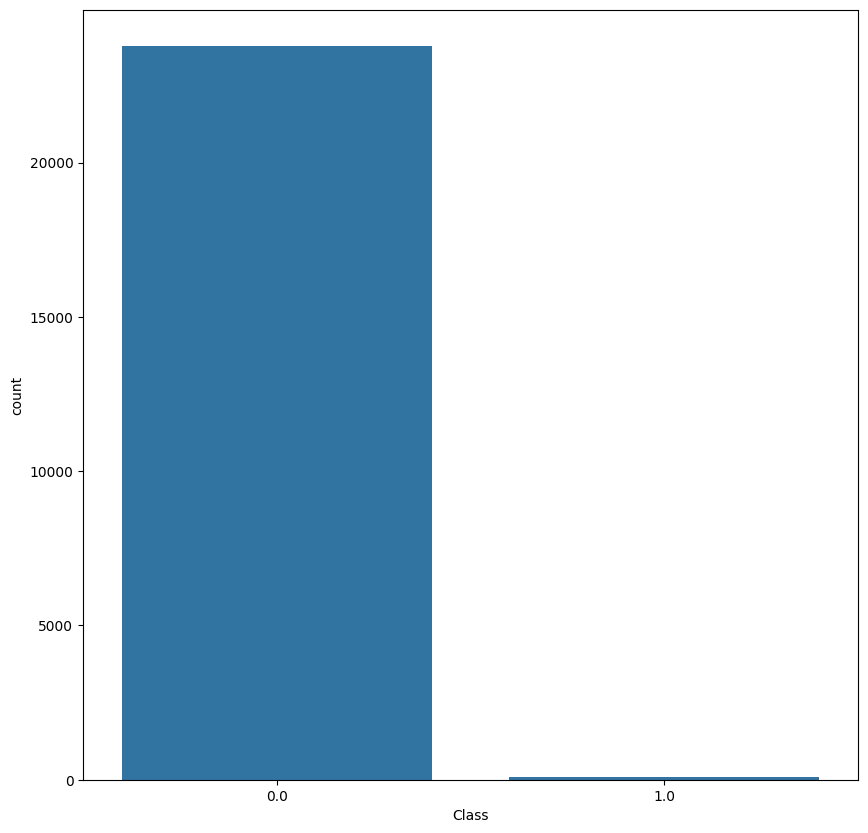

In [13]:
countplot_data(df, df.Class)


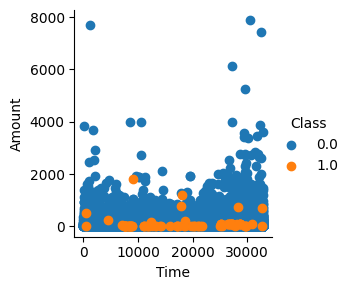

In [14]:
pairplot_data_grid(df, "Time", "Amount", "Class")

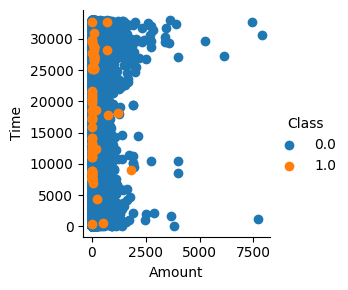

In [15]:
pairplot_data_grid(df, "Amount", "Time", "Class")

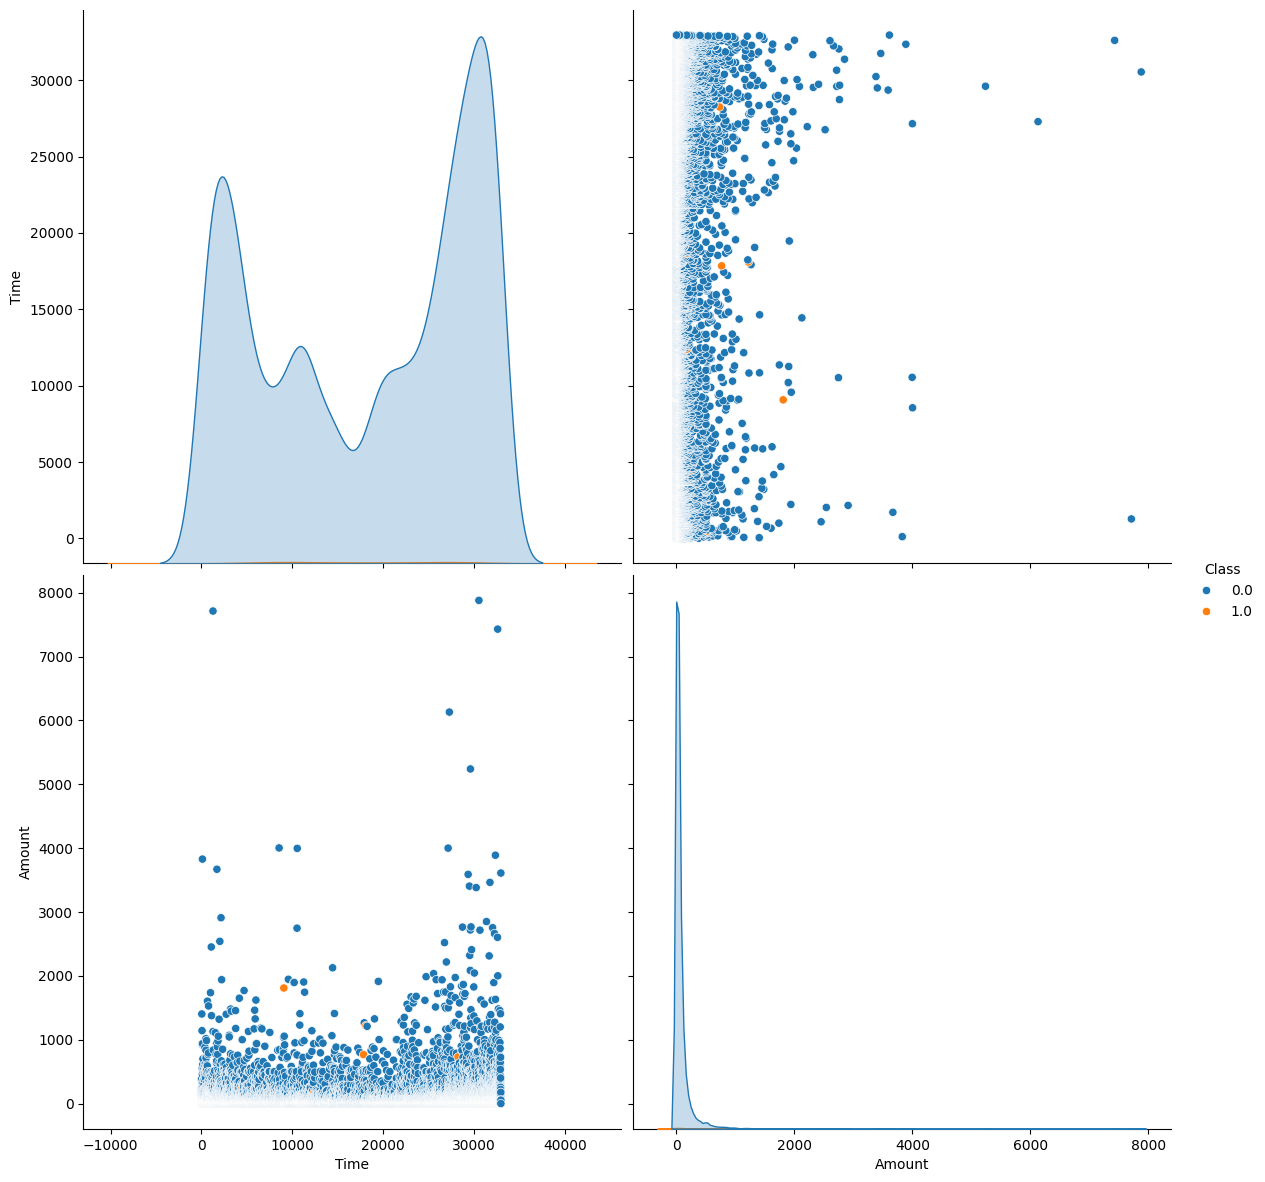

In [18]:
df_refine = df[["Time", "Amount", "Class"]]
sns.pairplot(df_refine, hue="Class", size=6)
plt.show()

In [19]:
amount_more = 0
amount_less = 0
for i in range(df_refine.shape[0]):
    if(df_refine.iloc[i]["Amount"] < 2500):
        amount_less += 1
    else:
        amount_more += 1
print(amount_more)
print(amount_less)

29
23829


In [20]:
fraud = 0
legitimate = 1
for i in range(df_refine.shape[0]):
    if(df_refine.iloc[i]["Amount"]<2500):
        if(df_refine.iloc[i]["Class"] == 0):
            legitimate += 1
        else:
            fraud+=1
print(fraud)
print(legitimate)

88
23742


In [21]:
percentage_less = (amount_less/df.shape[0])*100
percentage_less

99.87844748092883

In [22]:
df.Class.value_counts()

Class
0.0    23769
1.0       88
Name: count, dtype: int64

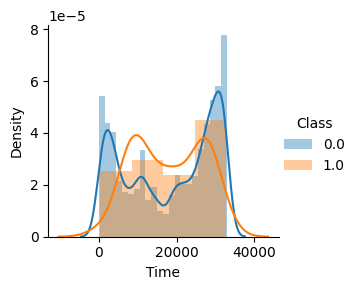

In [23]:
sns.FacetGrid(df_refine, hue="Class").map(sns.distplot,"Time").add_legend()
plt.show()

<Axes: >

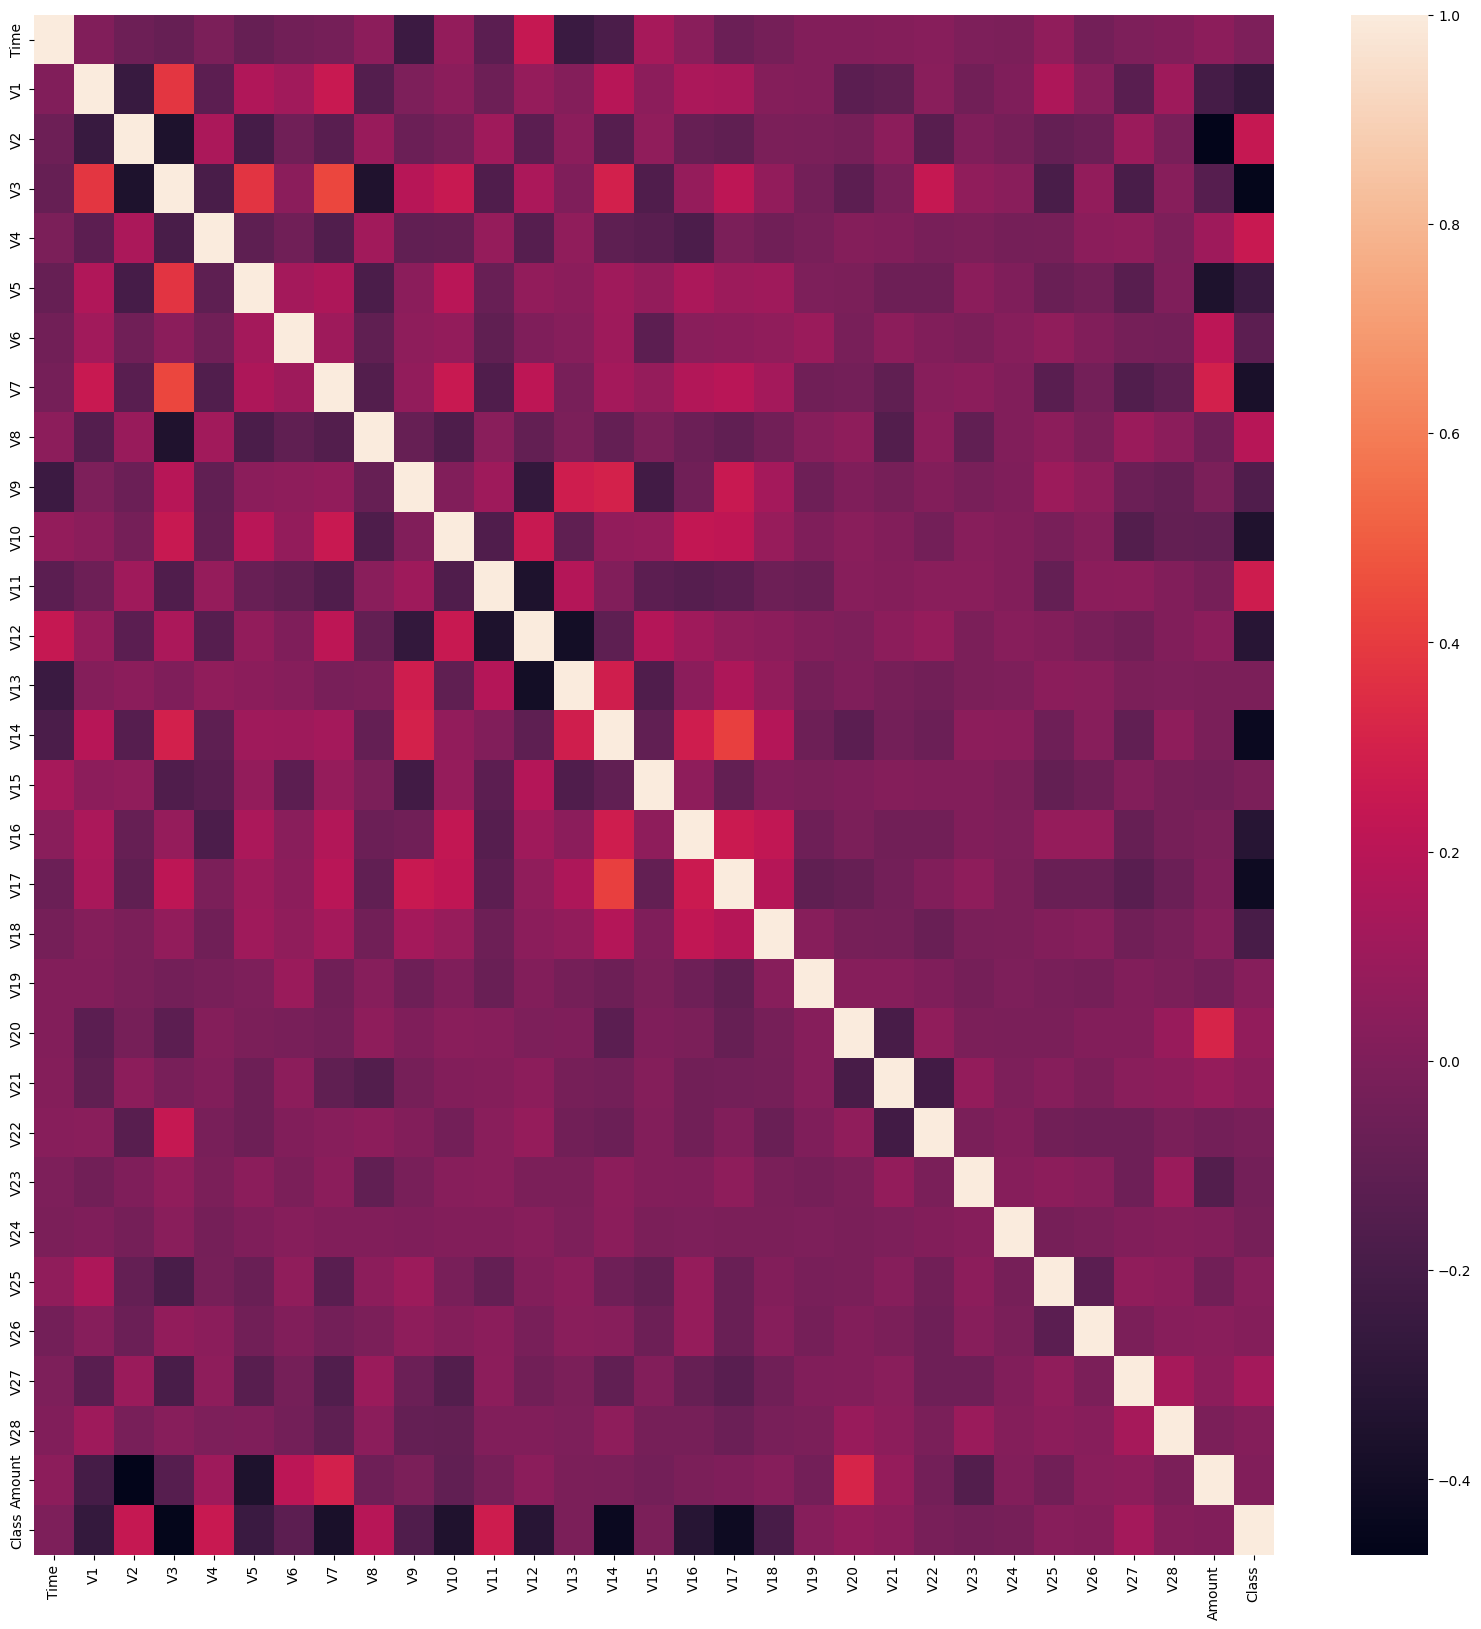

In [24]:
plt.figure(figsize=(20,20))
df_corr = df.corr()
sns.heatmap(df_corr)

In [31]:
df_without_nan = df.dropna()
X = df_without_nan.drop(labels='Class', axis=1)
y_without_nan = df_without_nan["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y_without_nan, test_size=0.3, random_state=1, stratify=y_without_nan
)

In [32]:
X = df.drop(labels='Class', axis=1) # Features
y = df.loc[:,'Class']               # Target Variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

ValueError: Input y contains NaN.

In [36]:
knn7 = KNeighborsClassifier(n_neighbors = 7)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [37]:
knn7.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_7 = knn7.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=7", accuracy_score(y_test, y_pred_7)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=7 99.6367700474993
Accuracy with k=1 99.65074043028778


In [39]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [40]:
from sklearn.feature_selection import mutual_info_classif
mutual_infos = pd.Series(data=mutual_info_classif(X_res, y_res, discrete_features=False, random_state=1), index=X_train.columns)

In [41]:
mutual_infos.sort_values(ascending=False)

V12       0.625430
V14       0.621033
V4        0.612961
V3        0.590779
V11       0.586759
V10       0.582739
V17       0.556395
V2        0.555710
V16       0.533028
V7        0.485591
V6        0.449385
V21       0.446852
V27       0.429700
V9        0.426290
V28       0.422624
V1        0.390777
V18       0.348426
Amount    0.341367
V5        0.325061
Time      0.318655
V20       0.303829
V8        0.303116
V23       0.261870
V26       0.256710
V25       0.214805
V24       0.211607
V13       0.156650
V15       0.146819
V19       0.133201
V22       0.132923
dtype: float64